### this feeds the aal-sphere FC to vae
* code allows using all four spheres, or picking one of them

In [1]:
# Auto-Reload for Fast Iteration
%load_ext autoreload
%autoreload 2

# Add project root to sys.path
import sys
import os
sys.path.append(os.path.abspath('..'))

# Import from base_script.py (which is in the root folder)
from base_script import *

# Import custom functions from your utils package
from utils.models import VAE, CVAE

from utils.train_utils import (
    train_vae,
    loss_function,
    get_latent_mu,
    compute_condition_distances
)

from utils.data_utils import (
    load_all_fc_data,
    preprocess_for_torch
)

from utils.utils_plotting import (
    plot_vae_losses,
    plot_latent_embedding_by_condition_and_subject,
    plot_subject_distance_comparison
)


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sub_cond_path = '/Users/liuq13/NODEAP_scripts/data_input/SubConds.xlsx'
base_nifti_folder = '/Volumes/X9Pro/NODEAP/FuncConn_AAL'
condition_map = {'N': 0, 'S': 1, 'C': 2}

In [3]:
# Load and preprocess
use_roi = 0
all_corr_data, all_tms_type, all_subject_id, all_stimloc, all_session = load_all_fc_data(sub_cond_path, 
                                                               base_nifti_folder, 
                                                               mat_filename='conn_matrix_w_sphere.mat',
                                                               key_name='correlation_matrix',row_idx=use_roi)
X_tensor = preprocess_for_torch(all_corr_data)
dataset = TensorDataset(X_tensor)
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

[WARN] File not found: /Volumes/X9Pro/NODEAP/FuncConn_AAL/NODEAP_30/S3D2/conn_matrix_w_sphere.mat
[WARN] File not found: /Volumes/X9Pro/NODEAP/FuncConn_AAL/NODEAP_44/S1D1/conn_matrix_w_sphere.mat
[WARN] File not found: /Volumes/X9Pro/NODEAP/FuncConn_AAL/NODEAP_83/S3D1/conn_matrix_w_sphere.mat
[WARN] File not found: /Volumes/X9Pro/NODEAP/FuncConn_AAL/NODEAP_87/D0/conn_matrix_w_sphere.mat
[WARN] File not found: /Volumes/X9Pro/NODEAP/FuncConn_AAL/NODEAP_88/D0/conn_matrix_w_sphere.mat
Columns with NaN: 14 / 116
Tensor shape after preprocessing: torch.Size([331, 102])


In [4]:
# Set up model, optimizer, and device
input_dim = X_tensor.shape[1]
latent_dim = 10
NUM_EPOCH = 500
LR = 3e-4
model = VAE(input_dim=input_dim, latent_dim=latent_dim)
optimizer = torch.optim.Adam(model.parameters(), lr=LR)
total_loss_hist, recon_loss_hist, kld_loss_hist = train_vae(model, dataloader, optimizer, device=DEVICE, epochs=NUM_EPOCH)


===== Epoch 1 =====


Epoch 1/500: 100%|█████████████████████████████| 11/11 [00:00<00:00, 149.38it/s]


Epoch 1, Loss: 106.1958, Recon: 105.8691, KL: 0.3267

===== Epoch 2 =====


Epoch 2/500: 100%|█████████████████████████████| 11/11 [00:00<00:00, 846.29it/s]


Epoch 2, Loss: 103.1407, Recon: 102.5466, KL: 0.5940

===== Epoch 3 =====


Epoch 3/500: 100%|█████████████████████████████| 11/11 [00:00<00:00, 850.46it/s]


Epoch 3, Loss: 98.4553, Recon: 97.0841, KL: 1.3711

===== Epoch 4 =====


Epoch 4/500: 100%|█████████████████████████████| 11/11 [00:00<00:00, 747.89it/s]


Epoch 4, Loss: 90.7806, Recon: 87.9362, KL: 2.8444

===== Epoch 5 =====


Epoch 5/500: 100%|█████████████████████████████| 11/11 [00:00<00:00, 821.83it/s]


Epoch 5, Loss: 82.2295, Recon: 77.0281, KL: 5.2014

===== Epoch 6 =====


Epoch 6/500: 100%|█████████████████████████████| 11/11 [00:00<00:00, 875.44it/s]


Epoch 6, Loss: 76.3559, Recon: 69.5483, KL: 6.8076

===== Epoch 7 =====


Epoch 7/500: 100%|█████████████████████████████| 11/11 [00:00<00:00, 965.58it/s]


Epoch 7, Loss: 69.2526, Recon: 62.1563, KL: 7.0963

===== Epoch 8 =====


Epoch 8/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 1005.67it/s]


Epoch 8, Loss: 64.8375, Recon: 57.0557, KL: 7.7818

===== Epoch 9 =====


Epoch 9/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 1054.25it/s]


Epoch 9, Loss: 62.3402, Recon: 54.2037, KL: 8.1364

===== Epoch 10 =====


Epoch 10/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 838.78it/s]


Epoch 10, Loss: 59.6056, Recon: 51.1737, KL: 8.4319

===== Epoch 11 =====


Epoch 11/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 472.10it/s]


Epoch 11, Loss: 57.6477, Recon: 48.7759, KL: 8.8718

===== Epoch 12 =====


Epoch 12/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 929.23it/s]


Epoch 12, Loss: 56.3819, Recon: 47.2337, KL: 9.1482

===== Epoch 13 =====


Epoch 13/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 342.63it/s]


Epoch 13, Loss: 55.0813, Recon: 45.9454, KL: 9.1359

===== Epoch 14 =====


Epoch 14/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 911.17it/s]


Epoch 14, Loss: 53.9679, Recon: 44.8635, KL: 9.1044

===== Epoch 15 =====


Epoch 15/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1022.89it/s]


Epoch 15, Loss: 52.5875, Recon: 43.3482, KL: 9.2393

===== Epoch 16 =====


Epoch 16/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 953.21it/s]


Epoch 16, Loss: 52.2161, Recon: 42.8005, KL: 9.4155

===== Epoch 17 =====


Epoch 17/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 971.15it/s]


Epoch 17, Loss: 51.0911, Recon: 41.5399, KL: 9.5512

===== Epoch 18 =====


Epoch 18/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1054.45it/s]


Epoch 18, Loss: 50.1842, Recon: 40.5940, KL: 9.5902

===== Epoch 19 =====


Epoch 19/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1020.60it/s]


Epoch 19, Loss: 49.6697, Recon: 40.1448, KL: 9.5250

===== Epoch 20 =====


Epoch 20/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 998.73it/s]


Epoch 20, Loss: 49.1184, Recon: 39.3522, KL: 9.7662

===== Epoch 21 =====


Epoch 21/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 916.81it/s]


Epoch 21, Loss: 48.3447, Recon: 38.4461, KL: 9.8986

===== Epoch 22 =====


Epoch 22/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 917.75it/s]


Epoch 22, Loss: 47.6052, Recon: 37.5202, KL: 10.0851

===== Epoch 23 =====


Epoch 23/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1046.82it/s]


Epoch 23, Loss: 47.1620, Recon: 37.0711, KL: 10.0909

===== Epoch 24 =====


Epoch 24/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 959.28it/s]


Epoch 24, Loss: 46.6461, Recon: 36.2958, KL: 10.3503

===== Epoch 25 =====


Epoch 25/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 859.17it/s]


Epoch 25, Loss: 46.4727, Recon: 36.0926, KL: 10.3802

===== Epoch 26 =====


Epoch 26/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 997.09it/s]


Epoch 26, Loss: 46.0095, Recon: 35.5395, KL: 10.4700

===== Epoch 27 =====


Epoch 27/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 791.42it/s]


Epoch 27, Loss: 45.1711, Recon: 34.6818, KL: 10.4894

===== Epoch 28 =====


Epoch 28/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1035.58it/s]


Epoch 28, Loss: 44.9536, Recon: 34.3581, KL: 10.5956

===== Epoch 29 =====


Epoch 29/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 892.70it/s]


Epoch 29, Loss: 44.6710, Recon: 33.9803, KL: 10.6907

===== Epoch 30 =====


Epoch 30/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 998.80it/s]


Epoch 30, Loss: 43.7486, Recon: 33.0445, KL: 10.7041

===== Epoch 31 =====


Epoch 31/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1120.14it/s]


Epoch 31, Loss: 44.1757, Recon: 33.4590, KL: 10.7166

===== Epoch 32 =====


Epoch 32/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1090.49it/s]


Epoch 32, Loss: 43.2458, Recon: 32.3090, KL: 10.9369

===== Epoch 33 =====


Epoch 33/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1196.41it/s]


Epoch 33, Loss: 43.0251, Recon: 31.9188, KL: 11.1064

===== Epoch 34 =====


Epoch 34/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1117.53it/s]


Epoch 34, Loss: 42.9405, Recon: 31.7943, KL: 11.1463

===== Epoch 35 =====


Epoch 35/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1178.27it/s]


Epoch 35, Loss: 42.2353, Recon: 31.1231, KL: 11.1122

===== Epoch 36 =====


Epoch 36/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1094.42it/s]


Epoch 36, Loss: 42.0066, Recon: 30.8020, KL: 11.2046

===== Epoch 37 =====


Epoch 37/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1153.78it/s]


Epoch 37, Loss: 42.3567, Recon: 30.9932, KL: 11.3636

===== Epoch 38 =====


Epoch 38/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1191.78it/s]


Epoch 38, Loss: 41.6779, Recon: 30.3489, KL: 11.3291

===== Epoch 39 =====


Epoch 39/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1255.44it/s]


Epoch 39, Loss: 41.7013, Recon: 30.1291, KL: 11.5722

===== Epoch 40 =====


Epoch 40/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1058.39it/s]


Epoch 40, Loss: 41.2068, Recon: 29.7587, KL: 11.4481

===== Epoch 41 =====


Epoch 41/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1297.34it/s]


Epoch 41, Loss: 41.0117, Recon: 29.4782, KL: 11.5335

===== Epoch 42 =====


Epoch 42/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1283.23it/s]


Epoch 42, Loss: 40.5343, Recon: 28.9885, KL: 11.5459

===== Epoch 43 =====


Epoch 43/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1301.29it/s]


Epoch 43, Loss: 41.0335, Recon: 29.6289, KL: 11.4046

===== Epoch 44 =====


Epoch 44/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1252.61it/s]


Epoch 44, Loss: 40.2805, Recon: 28.6476, KL: 11.6329

===== Epoch 45 =====


Epoch 45/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1199.71it/s]


Epoch 45, Loss: 40.2520, Recon: 28.6357, KL: 11.6163

===== Epoch 46 =====


Epoch 46/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1276.56it/s]


Epoch 46, Loss: 39.8432, Recon: 28.2108, KL: 11.6324

===== Epoch 47 =====


Epoch 47/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1273.04it/s]


Epoch 47, Loss: 40.2331, Recon: 28.5717, KL: 11.6614

===== Epoch 48 =====


Epoch 48/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1296.39it/s]


Epoch 48, Loss: 39.4931, Recon: 27.7005, KL: 11.7926

===== Epoch 49 =====


Epoch 49/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1259.31it/s]


Epoch 49, Loss: 39.0684, Recon: 27.2257, KL: 11.8427

===== Epoch 50 =====


Epoch 50/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1284.63it/s]


Epoch 50, Loss: 39.2084, Recon: 27.3991, KL: 11.8093

===== Epoch 51 =====


Epoch 51/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1285.95it/s]


Epoch 51, Loss: 38.7958, Recon: 26.9526, KL: 11.8432

===== Epoch 52 =====


Epoch 52/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1284.70it/s]


Epoch 52, Loss: 38.5061, Recon: 26.6502, KL: 11.8560

===== Epoch 53 =====


Epoch 53/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1163.38it/s]


Epoch 53, Loss: 38.4642, Recon: 26.7983, KL: 11.6659

===== Epoch 54 =====


Epoch 54/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1215.48it/s]


Epoch 54, Loss: 38.2598, Recon: 26.5818, KL: 11.6780

===== Epoch 55 =====


Epoch 55/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1244.60it/s]


Epoch 55, Loss: 38.4005, Recon: 26.5548, KL: 11.8457

===== Epoch 56 =====


Epoch 56/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1258.45it/s]


Epoch 56, Loss: 38.4981, Recon: 26.5859, KL: 11.9121

===== Epoch 57 =====


Epoch 57/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 959.70it/s]


Epoch 57, Loss: 37.9380, Recon: 25.9388, KL: 11.9992

===== Epoch 58 =====


Epoch 58/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 618.85it/s]


Epoch 58, Loss: 38.3138, Recon: 26.2625, KL: 12.0513

===== Epoch 59 =====


Epoch 59/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 906.68it/s]


Epoch 59, Loss: 37.9106, Recon: 25.8224, KL: 12.0881

===== Epoch 60 =====


Epoch 60/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 748.56it/s]


Epoch 60, Loss: 37.6959, Recon: 25.5777, KL: 12.1182

===== Epoch 61 =====


Epoch 61/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1232.37it/s]


Epoch 61, Loss: 37.4902, Recon: 25.4979, KL: 11.9923

===== Epoch 62 =====


Epoch 62/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1222.08it/s]


Epoch 62, Loss: 37.5453, Recon: 25.5663, KL: 11.9791

===== Epoch 63 =====


Epoch 63/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1275.64it/s]


Epoch 63, Loss: 37.5015, Recon: 25.5271, KL: 11.9744

===== Epoch 64 =====


Epoch 64/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1270.06it/s]


Epoch 64, Loss: 37.5086, Recon: 25.4504, KL: 12.0582

===== Epoch 65 =====


Epoch 65/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 844.91it/s]


Epoch 65, Loss: 37.1288, Recon: 24.9562, KL: 12.1725

===== Epoch 66 =====


Epoch 66/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1144.73it/s]


Epoch 66, Loss: 37.2118, Recon: 25.1438, KL: 12.0680

===== Epoch 67 =====


Epoch 67/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1263.79it/s]


Epoch 67, Loss: 36.9390, Recon: 24.8630, KL: 12.0760

===== Epoch 68 =====


Epoch 68/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1263.34it/s]


Epoch 68, Loss: 37.1156, Recon: 24.9662, KL: 12.1494

===== Epoch 69 =====


Epoch 69/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 949.58it/s]


Epoch 69, Loss: 36.8777, Recon: 24.7301, KL: 12.1476

===== Epoch 70 =====


Epoch 70/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1261.58it/s]


Epoch 70, Loss: 36.7291, Recon: 24.5789, KL: 12.1501

===== Epoch 71 =====


Epoch 71/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1231.51it/s]


Epoch 71, Loss: 37.0498, Recon: 24.9007, KL: 12.1491

===== Epoch 72 =====


Epoch 72/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1080.12it/s]


Epoch 72, Loss: 36.9976, Recon: 24.7037, KL: 12.2938

===== Epoch 73 =====


Epoch 73/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1075.69it/s]


Epoch 73, Loss: 36.7967, Recon: 24.4043, KL: 12.3924

===== Epoch 74 =====


Epoch 74/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1180.35it/s]


Epoch 74, Loss: 36.8328, Recon: 24.5229, KL: 12.3100

===== Epoch 75 =====


Epoch 75/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1160.10it/s]


Epoch 75, Loss: 36.5345, Recon: 24.2272, KL: 12.3072

===== Epoch 76 =====


Epoch 76/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1273.00it/s]


Epoch 76, Loss: 36.3302, Recon: 24.1622, KL: 12.1679

===== Epoch 77 =====


Epoch 77/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1247.33it/s]


Epoch 77, Loss: 36.3024, Recon: 24.0835, KL: 12.2189

===== Epoch 78 =====


Epoch 78/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1085.99it/s]


Epoch 78, Loss: 36.1668, Recon: 24.1151, KL: 12.0518

===== Epoch 79 =====


Epoch 79/500: 100%|████████████████████████████| 11/11 [00:00<00:00, 973.26it/s]


Epoch 79, Loss: 36.5080, Recon: 24.3798, KL: 12.1282

===== Epoch 80 =====


Epoch 80/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1214.40it/s]


Epoch 80, Loss: 36.2291, Recon: 24.0164, KL: 12.2127

===== Epoch 81 =====


Epoch 81/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1226.31it/s]


Epoch 81, Loss: 36.4798, Recon: 24.2075, KL: 12.2724

===== Epoch 82 =====


Epoch 82/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1225.75it/s]


Epoch 82, Loss: 36.1985, Recon: 23.9237, KL: 12.2747

===== Epoch 83 =====


Epoch 83/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1278.89it/s]


Epoch 83, Loss: 36.0063, Recon: 23.7074, KL: 12.2990

===== Epoch 84 =====


Epoch 84/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1275.64it/s]


Epoch 84, Loss: 35.9261, Recon: 23.7639, KL: 12.1622

===== Epoch 85 =====


Epoch 85/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1249.62it/s]


Epoch 85, Loss: 36.1733, Recon: 23.9175, KL: 12.2559

===== Epoch 86 =====


Epoch 86/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1271.53it/s]


Epoch 86, Loss: 36.0421, Recon: 23.7263, KL: 12.3158

===== Epoch 87 =====


Epoch 87/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1249.69it/s]


Epoch 87, Loss: 35.9127, Recon: 23.5432, KL: 12.3696

===== Epoch 88 =====


Epoch 88/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1256.29it/s]


Epoch 88, Loss: 35.9892, Recon: 23.6446, KL: 12.3446

===== Epoch 89 =====


Epoch 89/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1201.12it/s]


Epoch 89, Loss: 35.6526, Recon: 23.3258, KL: 12.3268

===== Epoch 90 =====


Epoch 90/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1265.94it/s]


Epoch 90, Loss: 35.5985, Recon: 23.2616, KL: 12.3369

===== Epoch 91 =====


Epoch 91/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1237.89it/s]


Epoch 91, Loss: 35.6052, Recon: 23.3365, KL: 12.2687

===== Epoch 92 =====


Epoch 92/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1272.44it/s]


Epoch 92, Loss: 35.6617, Recon: 23.3720, KL: 12.2897

===== Epoch 93 =====


Epoch 93/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1287.13it/s]


Epoch 93, Loss: 35.5188, Recon: 23.2820, KL: 12.2367

===== Epoch 94 =====


Epoch 94/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1249.28it/s]


Epoch 94, Loss: 35.6438, Recon: 23.3302, KL: 12.3136

===== Epoch 95 =====


Epoch 95/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1188.04it/s]


Epoch 95, Loss: 35.6021, Recon: 23.2302, KL: 12.3719

===== Epoch 96 =====


Epoch 96/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1248.30it/s]


Epoch 96, Loss: 35.2734, Recon: 22.8996, KL: 12.3738

===== Epoch 97 =====


Epoch 97/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1278.93it/s]


Epoch 97, Loss: 35.4844, Recon: 23.1378, KL: 12.3466

===== Epoch 98 =====


Epoch 98/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1216.29it/s]


Epoch 98, Loss: 35.4145, Recon: 23.0303, KL: 12.3842

===== Epoch 99 =====


Epoch 99/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 1239.98it/s]


Epoch 99, Loss: 35.4203, Recon: 23.0149, KL: 12.4054

===== Epoch 100 =====


Epoch 100/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1165.11it/s]


Epoch 100, Loss: 35.4121, Recon: 22.9730, KL: 12.4391

===== Epoch 101 =====


Epoch 101/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1178.36it/s]


Epoch 101, Loss: 35.2100, Recon: 22.7604, KL: 12.4496

===== Epoch 102 =====


Epoch 102/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1242.52it/s]


Epoch 102, Loss: 35.1004, Recon: 22.7069, KL: 12.3935

===== Epoch 103 =====


Epoch 103/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1282.06it/s]


Epoch 103, Loss: 34.8919, Recon: 22.5275, KL: 12.3644

===== Epoch 104 =====


Epoch 104/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1290.30it/s]


Epoch 104, Loss: 34.9595, Recon: 22.6464, KL: 12.3132

===== Epoch 105 =====


Epoch 105/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1234.84it/s]


Epoch 105, Loss: 35.1131, Recon: 22.7823, KL: 12.3308

===== Epoch 106 =====


Epoch 106/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1271.25it/s]


Epoch 106, Loss: 34.9354, Recon: 22.6017, KL: 12.3338

===== Epoch 107 =====


Epoch 107/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1232.93it/s]


Epoch 107, Loss: 35.1480, Recon: 22.7834, KL: 12.3647

===== Epoch 108 =====


Epoch 108/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1232.20it/s]


Epoch 108, Loss: 34.8770, Recon: 22.3853, KL: 12.4917

===== Epoch 109 =====


Epoch 109/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1216.57it/s]


Epoch 109, Loss: 34.9418, Recon: 22.4819, KL: 12.4599

===== Epoch 110 =====


Epoch 110/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1262.17it/s]


Epoch 110, Loss: 34.7077, Recon: 22.2166, KL: 12.4911

===== Epoch 111 =====


Epoch 111/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1108.75it/s]


Epoch 111, Loss: 34.9159, Recon: 22.4631, KL: 12.4528

===== Epoch 112 =====


Epoch 112/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1225.36it/s]


Epoch 112, Loss: 34.7840, Recon: 22.3524, KL: 12.4317

===== Epoch 113 =====


Epoch 113/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1254.72it/s]


Epoch 113, Loss: 34.6717, Recon: 22.2005, KL: 12.4711

===== Epoch 114 =====


Epoch 114/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1215.61it/s]


Epoch 114, Loss: 34.8481, Recon: 22.3890, KL: 12.4590

===== Epoch 115 =====


Epoch 115/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1248.14it/s]


Epoch 115, Loss: 34.2058, Recon: 21.7120, KL: 12.4938

===== Epoch 116 =====


Epoch 116/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1221.95it/s]


Epoch 116, Loss: 34.5122, Recon: 22.1866, KL: 12.3256

===== Epoch 117 =====


Epoch 117/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1262.20it/s]


Epoch 117, Loss: 34.4188, Recon: 22.1170, KL: 12.3018

===== Epoch 118 =====


Epoch 118/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1230.17it/s]


Epoch 118, Loss: 34.6572, Recon: 22.2417, KL: 12.4156

===== Epoch 119 =====


Epoch 119/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1076.01it/s]


Epoch 119, Loss: 34.4029, Recon: 22.0346, KL: 12.3684

===== Epoch 120 =====


Epoch 120/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1232.17it/s]


Epoch 120, Loss: 34.2550, Recon: 21.8450, KL: 12.4101

===== Epoch 121 =====


Epoch 121/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1255.40it/s]


Epoch 121, Loss: 34.4386, Recon: 22.0091, KL: 12.4295

===== Epoch 122 =====


Epoch 122/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1081.64it/s]


Epoch 122, Loss: 34.3192, Recon: 21.8039, KL: 12.5152

===== Epoch 123 =====


Epoch 123/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1116.96it/s]


Epoch 123, Loss: 34.4246, Recon: 21.9970, KL: 12.4276

===== Epoch 124 =====


Epoch 124/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1209.34it/s]


Epoch 124, Loss: 34.1546, Recon: 21.7428, KL: 12.4118

===== Epoch 125 =====


Epoch 125/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1274.65it/s]


Epoch 125, Loss: 34.4381, Recon: 22.0028, KL: 12.4353

===== Epoch 126 =====


Epoch 126/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1129.57it/s]


Epoch 126, Loss: 34.0945, Recon: 21.6165, KL: 12.4779

===== Epoch 127 =====


Epoch 127/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1253.29it/s]


Epoch 127, Loss: 34.2098, Recon: 21.6090, KL: 12.6008

===== Epoch 128 =====


Epoch 128/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1282.95it/s]


Epoch 128, Loss: 34.2746, Recon: 21.7577, KL: 12.5169

===== Epoch 129 =====


Epoch 129/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1229.35it/s]


Epoch 129, Loss: 34.3137, Recon: 21.7703, KL: 12.5434

===== Epoch 130 =====


Epoch 130/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1232.07it/s]


Epoch 130, Loss: 33.8715, Recon: 21.2734, KL: 12.5981

===== Epoch 131 =====


Epoch 131/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1283.55it/s]


Epoch 131, Loss: 33.9202, Recon: 21.3552, KL: 12.5650

===== Epoch 132 =====


Epoch 132/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1189.60it/s]


Epoch 132, Loss: 34.1349, Recon: 21.7388, KL: 12.3961

===== Epoch 133 =====


Epoch 133/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1142.27it/s]


Epoch 133, Loss: 33.7878, Recon: 21.3113, KL: 12.4765

===== Epoch 134 =====


Epoch 134/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1269.81it/s]


Epoch 134, Loss: 33.7545, Recon: 21.3302, KL: 12.4243

===== Epoch 135 =====


Epoch 135/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1260.31it/s]


Epoch 135, Loss: 34.2543, Recon: 21.9114, KL: 12.3429

===== Epoch 136 =====


Epoch 136/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1179.11it/s]


Epoch 136, Loss: 34.0790, Recon: 21.5290, KL: 12.5500

===== Epoch 137 =====


Epoch 137/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1286.88it/s]


Epoch 137, Loss: 34.2018, Recon: 21.6115, KL: 12.5903

===== Epoch 138 =====


Epoch 138/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1186.87it/s]


Epoch 138, Loss: 34.1254, Recon: 21.3788, KL: 12.7466

===== Epoch 139 =====


Epoch 139/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1170.70it/s]


Epoch 139, Loss: 33.9160, Recon: 21.1020, KL: 12.8140

===== Epoch 140 =====


Epoch 140/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1214.27it/s]


Epoch 140, Loss: 34.1182, Recon: 21.4730, KL: 12.6452

===== Epoch 141 =====


Epoch 141/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1266.99it/s]


Epoch 141, Loss: 33.7140, Recon: 21.1004, KL: 12.6136

===== Epoch 142 =====


Epoch 142/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1272.26it/s]


Epoch 142, Loss: 33.6739, Recon: 20.9711, KL: 12.7028

===== Epoch 143 =====


Epoch 143/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1249.12it/s]


Epoch 143, Loss: 33.8581, Recon: 21.3333, KL: 12.5248

===== Epoch 144 =====


Epoch 144/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1227.42it/s]


Epoch 144, Loss: 33.7807, Recon: 21.2059, KL: 12.5748

===== Epoch 145 =====


Epoch 145/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1239.85it/s]


Epoch 145, Loss: 33.7690, Recon: 21.1515, KL: 12.6175

===== Epoch 146 =====


Epoch 146/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1162.21it/s]


Epoch 146, Loss: 33.5645, Recon: 20.9122, KL: 12.6523

===== Epoch 147 =====


Epoch 147/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1200.62it/s]


Epoch 147, Loss: 33.6493, Recon: 21.1026, KL: 12.5467

===== Epoch 148 =====


Epoch 148/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1224.55it/s]


Epoch 148, Loss: 33.5220, Recon: 20.9420, KL: 12.5800

===== Epoch 149 =====


Epoch 149/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1263.52it/s]


Epoch 149, Loss: 33.7677, Recon: 21.1678, KL: 12.5999

===== Epoch 150 =====


Epoch 150/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1219.11it/s]


Epoch 150, Loss: 33.5102, Recon: 20.9441, KL: 12.5661

===== Epoch 151 =====


Epoch 151/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1247.83it/s]


Epoch 151, Loss: 33.5557, Recon: 20.9270, KL: 12.6286

===== Epoch 152 =====


Epoch 152/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1252.85it/s]


Epoch 152, Loss: 33.3521, Recon: 20.6961, KL: 12.6561

===== Epoch 153 =====


Epoch 153/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1250.13it/s]


Epoch 153, Loss: 33.7721, Recon: 21.1757, KL: 12.5963

===== Epoch 154 =====


Epoch 154/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1192.36it/s]


Epoch 154, Loss: 33.4862, Recon: 20.7986, KL: 12.6876

===== Epoch 155 =====


Epoch 155/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1216.41it/s]


Epoch 155, Loss: 33.3838, Recon: 20.7075, KL: 12.6763

===== Epoch 156 =====


Epoch 156/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1283.73it/s]


Epoch 156, Loss: 33.3381, Recon: 20.6971, KL: 12.6411

===== Epoch 157 =====


Epoch 157/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1250.13it/s]


Epoch 157, Loss: 33.4226, Recon: 20.7888, KL: 12.6338

===== Epoch 158 =====


Epoch 158/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1273.18it/s]


Epoch 158, Loss: 33.5483, Recon: 20.8510, KL: 12.6973

===== Epoch 159 =====


Epoch 159/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1233.19it/s]


Epoch 159, Loss: 33.4302, Recon: 20.7126, KL: 12.7176

===== Epoch 160 =====


Epoch 160/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1282.02it/s]


Epoch 160, Loss: 33.3042, Recon: 20.5215, KL: 12.7827

===== Epoch 161 =====


Epoch 161/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1273.74it/s]


Epoch 161, Loss: 33.1495, Recon: 20.3964, KL: 12.7531

===== Epoch 162 =====


Epoch 162/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 928.28it/s]


Epoch 162, Loss: 33.4951, Recon: 20.8038, KL: 12.6913

===== Epoch 163 =====


Epoch 163/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1279.21it/s]


Epoch 163, Loss: 33.0682, Recon: 20.3879, KL: 12.6803

===== Epoch 164 =====


Epoch 164/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1263.38it/s]


Epoch 164, Loss: 33.2471, Recon: 20.6320, KL: 12.6151

===== Epoch 165 =====


Epoch 165/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1239.85it/s]


Epoch 165, Loss: 33.2193, Recon: 20.6540, KL: 12.5652

===== Epoch 166 =====


Epoch 166/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1235.53it/s]


Epoch 166, Loss: 32.9200, Recon: 20.3021, KL: 12.6179

===== Epoch 167 =====


Epoch 167/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1279.53it/s]


Epoch 167, Loss: 33.1792, Recon: 20.4913, KL: 12.6879

===== Epoch 168 =====


Epoch 168/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1208.26it/s]


Epoch 168, Loss: 33.3110, Recon: 20.5291, KL: 12.7818

===== Epoch 169 =====


Epoch 169/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1191.26it/s]


Epoch 169, Loss: 32.9920, Recon: 20.2544, KL: 12.7376

===== Epoch 170 =====


Epoch 170/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1258.01it/s]


Epoch 170, Loss: 32.9900, Recon: 20.2741, KL: 12.7159

===== Epoch 171 =====


Epoch 171/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1217.60it/s]


Epoch 171, Loss: 33.3233, Recon: 20.5255, KL: 12.7977

===== Epoch 172 =====


Epoch 172/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1258.18it/s]


Epoch 172, Loss: 33.0954, Recon: 20.3548, KL: 12.7406

===== Epoch 173 =====


Epoch 173/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1206.52it/s]


Epoch 173, Loss: 32.9482, Recon: 20.1847, KL: 12.7635

===== Epoch 174 =====


Epoch 174/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1268.90it/s]


Epoch 174, Loss: 32.9416, Recon: 20.1978, KL: 12.7438

===== Epoch 175 =====


Epoch 175/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1265.08it/s]


Epoch 175, Loss: 32.8904, Recon: 20.2460, KL: 12.6444

===== Epoch 176 =====


Epoch 176/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1288.07it/s]


Epoch 176, Loss: 33.0824, Recon: 20.4482, KL: 12.6343

===== Epoch 177 =====


Epoch 177/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1207.31it/s]


Epoch 177, Loss: 32.6195, Recon: 19.8567, KL: 12.7628

===== Epoch 178 =====


Epoch 178/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1268.45it/s]


Epoch 178, Loss: 33.2644, Recon: 20.5405, KL: 12.7239

===== Epoch 179 =====


Epoch 179/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1239.02it/s]


Epoch 179, Loss: 32.9334, Recon: 20.1607, KL: 12.7727

===== Epoch 180 =====


Epoch 180/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1159.00it/s]


Epoch 180, Loss: 32.6694, Recon: 20.0049, KL: 12.6645

===== Epoch 181 =====


Epoch 181/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1219.34it/s]


Epoch 181, Loss: 32.9602, Recon: 20.2422, KL: 12.7180

===== Epoch 182 =====


Epoch 182/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1272.12it/s]


Epoch 182, Loss: 32.9614, Recon: 20.2253, KL: 12.7360

===== Epoch 183 =====


Epoch 183/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1264.49it/s]


Epoch 183, Loss: 32.9548, Recon: 20.1814, KL: 12.7733

===== Epoch 184 =====


Epoch 184/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1238.89it/s]


Epoch 184, Loss: 32.8518, Recon: 19.9782, KL: 12.8736

===== Epoch 185 =====


Epoch 185/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1239.85it/s]


Epoch 185, Loss: 32.7160, Recon: 19.9048, KL: 12.8112

===== Epoch 186 =====


Epoch 186/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1209.72it/s]


Epoch 186, Loss: 32.6681, Recon: 19.8903, KL: 12.7778

===== Epoch 187 =====


Epoch 187/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1258.59it/s]


Epoch 187, Loss: 32.9161, Recon: 20.1708, KL: 12.7454

===== Epoch 188 =====


Epoch 188/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1225.75it/s]


Epoch 188, Loss: 32.9104, Recon: 20.0602, KL: 12.8502

===== Epoch 189 =====


Epoch 189/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1277.41it/s]


Epoch 189, Loss: 32.8334, Recon: 19.9387, KL: 12.8947

===== Epoch 190 =====


Epoch 190/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1284.77it/s]


Epoch 190, Loss: 32.5809, Recon: 19.6487, KL: 12.9322

===== Epoch 191 =====


Epoch 191/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1212.67it/s]


Epoch 191, Loss: 33.0100, Recon: 20.1842, KL: 12.8258

===== Epoch 192 =====


Epoch 192/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1246.75it/s]


Epoch 192, Loss: 32.5686, Recon: 19.6817, KL: 12.8869

===== Epoch 193 =====


Epoch 193/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1270.06it/s]


Epoch 193, Loss: 32.6306, Recon: 19.7630, KL: 12.8676

===== Epoch 194 =====


Epoch 194/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1234.41it/s]


Epoch 194, Loss: 32.5402, Recon: 19.8130, KL: 12.7272

===== Epoch 195 =====


Epoch 195/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1269.92it/s]


Epoch 195, Loss: 32.6573, Recon: 19.9273, KL: 12.7300

===== Epoch 196 =====


Epoch 196/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1222.08it/s]


Epoch 196, Loss: 32.4301, Recon: 19.7522, KL: 12.6779

===== Epoch 197 =====


Epoch 197/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1249.45it/s]


Epoch 197, Loss: 32.5639, Recon: 19.8999, KL: 12.6640

===== Epoch 198 =====


Epoch 198/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1266.57it/s]


Epoch 198, Loss: 32.7333, Recon: 19.9372, KL: 12.7960

===== Epoch 199 =====


Epoch 199/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1275.78it/s]


Epoch 199, Loss: 32.7032, Recon: 19.7758, KL: 12.9274

===== Epoch 200 =====


Epoch 200/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1263.07it/s]


Epoch 200, Loss: 32.6247, Recon: 19.7100, KL: 12.9146

===== Epoch 201 =====


Epoch 201/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1232.07it/s]


Epoch 201, Loss: 32.1192, Recon: 19.2280, KL: 12.8912

===== Epoch 202 =====


Epoch 202/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1285.81it/s]


Epoch 202, Loss: 32.4669, Recon: 19.7117, KL: 12.7553

===== Epoch 203 =====


Epoch 203/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1279.50it/s]


Epoch 203, Loss: 32.6592, Recon: 19.9688, KL: 12.6904

===== Epoch 204 =====


Epoch 204/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1229.18it/s]


Epoch 204, Loss: 32.4351, Recon: 19.5442, KL: 12.8909

===== Epoch 205 =====


Epoch 205/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1210.26it/s]


Epoch 205, Loss: 32.3942, Recon: 19.5680, KL: 12.8262

===== Epoch 206 =====


Epoch 206/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 708.44it/s]


Epoch 206, Loss: 32.3976, Recon: 19.6102, KL: 12.7874

===== Epoch 207 =====


Epoch 207/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1239.95it/s]


Epoch 207, Loss: 32.3061, Recon: 19.4316, KL: 12.8746

===== Epoch 208 =====


Epoch 208/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1122.56it/s]


Epoch 208, Loss: 32.1917, Recon: 19.3431, KL: 12.8485

===== Epoch 209 =====


Epoch 209/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1269.01it/s]


Epoch 209, Loss: 32.3549, Recon: 19.6976, KL: 12.6573

===== Epoch 210 =====


Epoch 210/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1265.25it/s]


Epoch 210, Loss: 32.4245, Recon: 19.6542, KL: 12.7703

===== Epoch 211 =====


Epoch 211/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1201.90it/s]


Epoch 211, Loss: 32.3606, Recon: 19.4345, KL: 12.9261

===== Epoch 212 =====


Epoch 212/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1210.80it/s]


Epoch 212, Loss: 32.0949, Recon: 19.2300, KL: 12.8648

===== Epoch 213 =====


Epoch 213/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1270.09it/s]


Epoch 213, Loss: 32.1423, Recon: 19.3417, KL: 12.8005

===== Epoch 214 =====


Epoch 214/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1238.49it/s]


Epoch 214, Loss: 32.3241, Recon: 19.5847, KL: 12.7394

===== Epoch 215 =====


Epoch 215/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1273.91it/s]


Epoch 215, Loss: 31.9261, Recon: 19.1500, KL: 12.7761

===== Epoch 216 =====


Epoch 216/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1234.54it/s]


Epoch 216, Loss: 32.2654, Recon: 19.5053, KL: 12.7601

===== Epoch 217 =====


Epoch 217/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 944.45it/s]


Epoch 217, Loss: 32.2593, Recon: 19.4373, KL: 12.8221

===== Epoch 218 =====


Epoch 218/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1203.00it/s]


Epoch 218, Loss: 32.1852, Recon: 19.3844, KL: 12.8007

===== Epoch 219 =====


Epoch 219/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1153.52it/s]


Epoch 219, Loss: 32.3531, Recon: 19.4684, KL: 12.8847

===== Epoch 220 =====


Epoch 220/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1255.85it/s]


Epoch 220, Loss: 32.1635, Recon: 19.2815, KL: 12.8820

===== Epoch 221 =====


Epoch 221/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1238.15it/s]


Epoch 221, Loss: 32.2151, Recon: 19.4635, KL: 12.7516

===== Epoch 222 =====


Epoch 222/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1242.52it/s]


Epoch 222, Loss: 32.2441, Recon: 19.4115, KL: 12.8326

===== Epoch 223 =====


Epoch 223/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1261.65it/s]


Epoch 223, Loss: 32.1596, Recon: 19.3036, KL: 12.8560

===== Epoch 224 =====


Epoch 224/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1266.12it/s]


Epoch 224, Loss: 32.1337, Recon: 19.2621, KL: 12.8717

===== Epoch 225 =====


Epoch 225/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1225.95it/s]


Epoch 225, Loss: 32.3016, Recon: 19.3209, KL: 12.9807

===== Epoch 226 =====


Epoch 226/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1292.94it/s]


Epoch 226, Loss: 32.1103, Recon: 19.1194, KL: 12.9909

===== Epoch 227 =====


Epoch 227/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1269.78it/s]


Epoch 227, Loss: 32.0751, Recon: 19.1971, KL: 12.8780

===== Epoch 228 =====


Epoch 228/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1250.88it/s]


Epoch 228, Loss: 32.2814, Recon: 19.3986, KL: 12.8828

===== Epoch 229 =====


Epoch 229/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1179.26it/s]


Epoch 229, Loss: 32.0979, Recon: 19.1276, KL: 12.9703

===== Epoch 230 =====


Epoch 230/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1207.47it/s]


Epoch 230, Loss: 32.1474, Recon: 19.0680, KL: 13.0794

===== Epoch 231 =====


Epoch 231/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1240.82it/s]


Epoch 231, Loss: 32.0429, Recon: 19.0813, KL: 12.9617

===== Epoch 232 =====


Epoch 232/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1218.34it/s]


Epoch 232, Loss: 32.2546, Recon: 19.2755, KL: 12.9792

===== Epoch 233 =====


Epoch 233/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1259.76it/s]


Epoch 233, Loss: 32.2614, Recon: 19.2068, KL: 13.0546

===== Epoch 234 =====


Epoch 234/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1208.80it/s]


Epoch 234, Loss: 32.0226, Recon: 18.9572, KL: 13.0654

===== Epoch 235 =====


Epoch 235/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1270.51it/s]


Epoch 235, Loss: 32.0393, Recon: 19.1145, KL: 12.9248

===== Epoch 236 =====


Epoch 236/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1289.11it/s]


Epoch 236, Loss: 31.8799, Recon: 18.9220, KL: 12.9580

===== Epoch 237 =====


Epoch 237/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1205.61it/s]


Epoch 237, Loss: 31.9986, Recon: 19.1108, KL: 12.8878

===== Epoch 238 =====


Epoch 238/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1272.30it/s]


Epoch 238, Loss: 32.0110, Recon: 19.1321, KL: 12.8790

===== Epoch 239 =====


Epoch 239/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1239.88it/s]


Epoch 239, Loss: 31.8187, Recon: 18.7802, KL: 13.0385

===== Epoch 240 =====


Epoch 240/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1252.17it/s]


Epoch 240, Loss: 31.8590, Recon: 18.9385, KL: 12.9205

===== Epoch 241 =====


Epoch 241/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1260.62it/s]


Epoch 241, Loss: 31.8642, Recon: 18.9897, KL: 12.8745

===== Epoch 242 =====


Epoch 242/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1232.50it/s]


Epoch 242, Loss: 31.8224, Recon: 18.9463, KL: 12.8761

===== Epoch 243 =====


Epoch 243/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1230.33it/s]


Epoch 243, Loss: 31.6649, Recon: 18.8277, KL: 12.8372

===== Epoch 244 =====


Epoch 244/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1259.72it/s]


Epoch 244, Loss: 31.9226, Recon: 19.0689, KL: 12.8538

===== Epoch 245 =====


Epoch 245/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1252.98it/s]


Epoch 245, Loss: 31.8356, Recon: 18.8567, KL: 12.9789

===== Epoch 246 =====


Epoch 246/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1253.97it/s]


Epoch 246, Loss: 31.8491, Recon: 18.9146, KL: 12.9345

===== Epoch 247 =====


Epoch 247/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1176.37it/s]


Epoch 247, Loss: 32.0786, Recon: 19.0438, KL: 13.0349

===== Epoch 248 =====


Epoch 248/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1276.84it/s]


Epoch 248, Loss: 31.9293, Recon: 18.8092, KL: 13.1201

===== Epoch 249 =====


Epoch 249/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1257.83it/s]


Epoch 249, Loss: 31.8803, Recon: 18.7808, KL: 13.0996

===== Epoch 250 =====


Epoch 250/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1278.18it/s]


Epoch 250, Loss: 31.6988, Recon: 18.6851, KL: 13.0137

===== Epoch 251 =====


Epoch 251/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1264.38it/s]


Epoch 251, Loss: 31.8026, Recon: 18.8319, KL: 12.9707

===== Epoch 252 =====


Epoch 252/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1267.68it/s]


Epoch 252, Loss: 31.6625, Recon: 18.6665, KL: 12.9959

===== Epoch 253 =====


Epoch 253/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1259.45it/s]


Epoch 253, Loss: 31.6756, Recon: 18.7567, KL: 12.9189

===== Epoch 254 =====


Epoch 254/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1221.44it/s]


Epoch 254, Loss: 32.0814, Recon: 19.1538, KL: 12.9276

===== Epoch 255 =====


Epoch 255/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1214.24it/s]


Epoch 255, Loss: 31.8103, Recon: 18.6208, KL: 13.1895

===== Epoch 256 =====


Epoch 256/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1303.90it/s]


Epoch 256, Loss: 31.7655, Recon: 18.6244, KL: 13.1411

===== Epoch 257 =====


Epoch 257/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1267.75it/s]


Epoch 257, Loss: 31.7778, Recon: 18.7192, KL: 13.0586

===== Epoch 258 =====


Epoch 258/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1262.93it/s]


Epoch 258, Loss: 31.8905, Recon: 18.8581, KL: 13.0323

===== Epoch 259 =====


Epoch 259/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1260.89it/s]


Epoch 259, Loss: 31.6850, Recon: 18.5295, KL: 13.1555

===== Epoch 260 =====


Epoch 260/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1247.43it/s]


Epoch 260, Loss: 31.7109, Recon: 18.5732, KL: 13.1377

===== Epoch 261 =====


Epoch 261/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1266.40it/s]


Epoch 261, Loss: 31.5654, Recon: 18.5594, KL: 13.0060

===== Epoch 262 =====


Epoch 262/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1207.31it/s]


Epoch 262, Loss: 31.4227, Recon: 18.4131, KL: 13.0095

===== Epoch 263 =====


Epoch 263/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1250.84it/s]


Epoch 263, Loss: 31.2389, Recon: 18.3599, KL: 12.8789

===== Epoch 264 =====


Epoch 264/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1254.24it/s]


Epoch 264, Loss: 31.5463, Recon: 18.7637, KL: 12.7826

===== Epoch 265 =====


Epoch 265/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1276.56it/s]


Epoch 265, Loss: 31.3298, Recon: 18.4259, KL: 12.9039

===== Epoch 266 =====


Epoch 266/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1283.27it/s]


Epoch 266, Loss: 31.6293, Recon: 18.6514, KL: 12.9779

===== Epoch 267 =====


Epoch 267/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1265.25it/s]


Epoch 267, Loss: 31.3359, Recon: 18.3727, KL: 12.9632

===== Epoch 268 =====


Epoch 268/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1268.76it/s]


Epoch 268, Loss: 31.6909, Recon: 18.7088, KL: 12.9820

===== Epoch 269 =====


Epoch 269/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1278.75it/s]


Epoch 269, Loss: 31.5421, Recon: 18.5325, KL: 13.0095

===== Epoch 270 =====


Epoch 270/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1201.77it/s]


Epoch 270, Loss: 31.2567, Recon: 18.2188, KL: 13.0379

===== Epoch 271 =====


Epoch 271/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1284.45it/s]


Epoch 271, Loss: 31.5218, Recon: 18.5678, KL: 12.9540

===== Epoch 272 =====


Epoch 272/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1311.28it/s]


Epoch 272, Loss: 31.3904, Recon: 18.4871, KL: 12.9033

===== Epoch 273 =====


Epoch 273/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1117.88it/s]


Epoch 273, Loss: 31.5602, Recon: 18.6145, KL: 12.9457

===== Epoch 274 =====


Epoch 274/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 460.14it/s]


Epoch 274, Loss: 31.4714, Recon: 18.4635, KL: 13.0079

===== Epoch 275 =====


Epoch 275/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1084.92it/s]


Epoch 275, Loss: 31.6000, Recon: 18.5188, KL: 13.0812

===== Epoch 276 =====


Epoch 276/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 983.91it/s]


Epoch 276, Loss: 31.1800, Recon: 18.0325, KL: 13.1474

===== Epoch 277 =====


Epoch 277/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1218.47it/s]


Epoch 277, Loss: 31.3020, Recon: 18.3337, KL: 12.9683

===== Epoch 278 =====


Epoch 278/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1192.03it/s]


Epoch 278, Loss: 31.2749, Recon: 18.3694, KL: 12.9055

===== Epoch 279 =====


Epoch 279/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1260.58it/s]


Epoch 279, Loss: 31.4425, Recon: 18.4366, KL: 13.0058

===== Epoch 280 =====


Epoch 280/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1220.63it/s]


Epoch 280, Loss: 31.5374, Recon: 18.5188, KL: 13.0186

===== Epoch 281 =====


Epoch 281/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1268.14it/s]


Epoch 281, Loss: 31.4321, Recon: 18.2933, KL: 13.1388

===== Epoch 282 =====


Epoch 282/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1210.26it/s]


Epoch 282, Loss: 31.0008, Recon: 17.9037, KL: 13.0971

===== Epoch 283 =====


Epoch 283/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1243.19it/s]


Epoch 283, Loss: 31.3552, Recon: 18.4284, KL: 12.9268

===== Epoch 284 =====


Epoch 284/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1267.61it/s]


Epoch 284, Loss: 31.2711, Recon: 18.3362, KL: 12.9349

===== Epoch 285 =====


Epoch 285/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1220.73it/s]


Epoch 285, Loss: 31.3784, Recon: 18.4477, KL: 12.9307

===== Epoch 286 =====


Epoch 286/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1203.47it/s]


Epoch 286, Loss: 31.4794, Recon: 18.4279, KL: 13.0515

===== Epoch 287 =====


Epoch 287/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1242.49it/s]


Epoch 287, Loss: 31.2187, Recon: 18.0320, KL: 13.1867

===== Epoch 288 =====


Epoch 288/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 950.56it/s]


Epoch 288, Loss: 31.3072, Recon: 18.2618, KL: 13.0454

===== Epoch 289 =====


Epoch 289/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1181.68it/s]


Epoch 289, Loss: 31.4825, Recon: 18.4555, KL: 13.0269

===== Epoch 290 =====


Epoch 290/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1237.22it/s]


Epoch 290, Loss: 31.3930, Recon: 18.2745, KL: 13.1186

===== Epoch 291 =====


Epoch 291/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1260.17it/s]


Epoch 291, Loss: 31.2541, Recon: 17.9746, KL: 13.2795

===== Epoch 292 =====


Epoch 292/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1157.66it/s]


Epoch 292, Loss: 31.3203, Recon: 18.1889, KL: 13.1314

===== Epoch 293 =====


Epoch 293/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1265.39it/s]


Epoch 293, Loss: 31.3946, Recon: 18.3396, KL: 13.0550

===== Epoch 294 =====


Epoch 294/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1209.75it/s]


Epoch 294, Loss: 31.0221, Recon: 17.8598, KL: 13.1623

===== Epoch 295 =====


Epoch 295/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1231.68it/s]


Epoch 295, Loss: 31.1835, Recon: 18.0824, KL: 13.1012

===== Epoch 296 =====


Epoch 296/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1222.08it/s]


Epoch 296, Loss: 31.1515, Recon: 18.1218, KL: 13.0298

===== Epoch 297 =====


Epoch 297/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 966.94it/s]


Epoch 297, Loss: 31.0076, Recon: 18.0171, KL: 12.9905

===== Epoch 298 =====


Epoch 298/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1210.51it/s]


Epoch 298, Loss: 31.0665, Recon: 18.0813, KL: 12.9852

===== Epoch 299 =====


Epoch 299/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1272.23it/s]


Epoch 299, Loss: 31.3926, Recon: 18.4099, KL: 12.9827

===== Epoch 300 =====


Epoch 300/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1204.00it/s]


Epoch 300, Loss: 31.4229, Recon: 18.2419, KL: 13.1810

===== Epoch 301 =====


Epoch 301/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1285.38it/s]


Epoch 301, Loss: 31.3629, Recon: 18.0838, KL: 13.2791

===== Epoch 302 =====


Epoch 302/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1273.60it/s]


Epoch 302, Loss: 31.1167, Recon: 17.9076, KL: 13.2090

===== Epoch 303 =====


Epoch 303/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1144.90it/s]


Epoch 303, Loss: 31.2657, Recon: 18.0844, KL: 13.1814

===== Epoch 304 =====


Epoch 304/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1197.87it/s]


Epoch 304, Loss: 31.2777, Recon: 18.1090, KL: 13.1686

===== Epoch 305 =====


Epoch 305/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1220.18it/s]


Epoch 305, Loss: 31.2024, Recon: 17.9619, KL: 13.2405

===== Epoch 306 =====


Epoch 306/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1243.02it/s]


Epoch 306, Loss: 31.2297, Recon: 18.0567, KL: 13.1730

===== Epoch 307 =====


Epoch 307/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1227.38it/s]


Epoch 307, Loss: 31.2778, Recon: 18.0088, KL: 13.2689

===== Epoch 308 =====


Epoch 308/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1224.94it/s]


Epoch 308, Loss: 30.9592, Recon: 17.7122, KL: 13.2470

===== Epoch 309 =====


Epoch 309/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1270.06it/s]


Epoch 309, Loss: 31.2000, Recon: 18.0717, KL: 13.1283

===== Epoch 310 =====


Epoch 310/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1253.56it/s]


Epoch 310, Loss: 31.0423, Recon: 17.8801, KL: 13.1622

===== Epoch 311 =====


Epoch 311/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1202.75it/s]


Epoch 311, Loss: 30.9446, Recon: 17.8601, KL: 13.0845

===== Epoch 312 =====


Epoch 312/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1261.89it/s]


Epoch 312, Loss: 31.0008, Recon: 17.9184, KL: 13.0824

===== Epoch 313 =====


Epoch 313/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1276.24it/s]


Epoch 313, Loss: 31.1386, Recon: 18.0327, KL: 13.1059

===== Epoch 314 =====


Epoch 314/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1265.39it/s]


Epoch 314, Loss: 31.0219, Recon: 17.8706, KL: 13.1513

===== Epoch 315 =====


Epoch 315/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1259.17it/s]


Epoch 315, Loss: 31.2410, Recon: 18.0876, KL: 13.1534

===== Epoch 316 =====


Epoch 316/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1188.95it/s]


Epoch 316, Loss: 31.1152, Recon: 17.8652, KL: 13.2500

===== Epoch 317 =====


Epoch 317/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1267.58it/s]


Epoch 317, Loss: 31.1771, Recon: 17.8891, KL: 13.2880

===== Epoch 318 =====


Epoch 318/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1210.76it/s]


Epoch 318, Loss: 31.1962, Recon: 17.9528, KL: 13.2434

===== Epoch 319 =====


Epoch 319/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1244.06it/s]


Epoch 319, Loss: 31.1259, Recon: 17.7727, KL: 13.3533

===== Epoch 320 =====


Epoch 320/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1252.44it/s]


Epoch 320, Loss: 31.0040, Recon: 17.7034, KL: 13.3006

===== Epoch 321 =====


Epoch 321/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1223.58it/s]


Epoch 321, Loss: 31.0673, Recon: 17.8432, KL: 13.2241

===== Epoch 322 =====


Epoch 322/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1239.05it/s]


Epoch 322, Loss: 30.9407, Recon: 17.6661, KL: 13.2747

===== Epoch 323 =====


Epoch 323/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1247.02it/s]


Epoch 323, Loss: 30.9148, Recon: 17.7062, KL: 13.2087

===== Epoch 324 =====


Epoch 324/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1260.14it/s]


Epoch 324, Loss: 30.9748, Recon: 17.7438, KL: 13.2310

===== Epoch 325 =====


Epoch 325/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1267.61it/s]


Epoch 325, Loss: 30.7384, Recon: 17.5868, KL: 13.1516

===== Epoch 326 =====


Epoch 326/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1223.96it/s]


Epoch 326, Loss: 30.9492, Recon: 17.7719, KL: 13.1772

===== Epoch 327 =====


Epoch 327/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1268.17it/s]


Epoch 327, Loss: 30.9290, Recon: 17.6860, KL: 13.2431

===== Epoch 328 =====


Epoch 328/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1174.52it/s]


Epoch 328, Loss: 30.8100, Recon: 17.6003, KL: 13.2098

===== Epoch 329 =====


Epoch 329/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1217.76it/s]


Epoch 329, Loss: 30.8236, Recon: 17.6253, KL: 13.1983

===== Epoch 330 =====


Epoch 330/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1214.11it/s]


Epoch 330, Loss: 30.9429, Recon: 17.7622, KL: 13.1807

===== Epoch 331 =====


Epoch 331/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1245.71it/s]


Epoch 331, Loss: 30.9421, Recon: 17.8044, KL: 13.1377

===== Epoch 332 =====


Epoch 332/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 913.47it/s]


Epoch 332, Loss: 30.8363, Recon: 17.6559, KL: 13.1803

===== Epoch 333 =====


Epoch 333/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1059.95it/s]


Epoch 333, Loss: 30.9002, Recon: 17.6399, KL: 13.2603

===== Epoch 334 =====


Epoch 334/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1319.57it/s]


Epoch 334, Loss: 30.9253, Recon: 17.7991, KL: 13.1262

===== Epoch 335 =====


Epoch 335/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1226.96it/s]


Epoch 335, Loss: 30.7556, Recon: 17.5939, KL: 13.1616

===== Epoch 336 =====


Epoch 336/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1084.72it/s]


Epoch 336, Loss: 30.8268, Recon: 17.6042, KL: 13.2227

===== Epoch 337 =====


Epoch 337/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1228.49it/s]


Epoch 337, Loss: 30.8948, Recon: 17.6051, KL: 13.2897

===== Epoch 338 =====


Epoch 338/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1297.20it/s]


Epoch 338, Loss: 30.8500, Recon: 17.6213, KL: 13.2286

===== Epoch 339 =====


Epoch 339/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1050.92it/s]


Epoch 339, Loss: 30.6312, Recon: 17.4532, KL: 13.1779

===== Epoch 340 =====


Epoch 340/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1280.60it/s]


Epoch 340, Loss: 30.8447, Recon: 17.7088, KL: 13.1359

===== Epoch 341 =====


Epoch 341/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1282.95it/s]


Epoch 341, Loss: 30.9672, Recon: 17.7675, KL: 13.1996

===== Epoch 342 =====


Epoch 342/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1274.76it/s]


Epoch 342, Loss: 30.8523, Recon: 17.4923, KL: 13.3600

===== Epoch 343 =====


Epoch 343/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1286.52it/s]


Epoch 343, Loss: 30.9305, Recon: 17.6042, KL: 13.3263

===== Epoch 344 =====


Epoch 344/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1274.76it/s]


Epoch 344, Loss: 30.6731, Recon: 17.4206, KL: 13.2525

===== Epoch 345 =====


Epoch 345/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1318.47it/s]


Epoch 345, Loss: 30.7469, Recon: 17.4920, KL: 13.2549

===== Epoch 346 =====


Epoch 346/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1278.29it/s]


Epoch 346, Loss: 30.7294, Recon: 17.5525, KL: 13.1768

===== Epoch 347 =====


Epoch 347/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1210.92it/s]


Epoch 347, Loss: 30.8389, Recon: 17.6743, KL: 13.1647

===== Epoch 348 =====


Epoch 348/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1286.52it/s]


Epoch 348, Loss: 30.7443, Recon: 17.5541, KL: 13.1902

===== Epoch 349 =====


Epoch 349/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1257.29it/s]


Epoch 349, Loss: 30.6611, Recon: 17.4474, KL: 13.2138

===== Epoch 350 =====


Epoch 350/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1256.98it/s]


Epoch 350, Loss: 30.6746, Recon: 17.4350, KL: 13.2396

===== Epoch 351 =====


Epoch 351/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1280.06it/s]


Epoch 351, Loss: 30.8225, Recon: 17.5715, KL: 13.2509

===== Epoch 352 =====


Epoch 352/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1248.30it/s]


Epoch 352, Loss: 30.8541, Recon: 17.6291, KL: 13.2250

===== Epoch 353 =====


Epoch 353/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1247.33it/s]


Epoch 353, Loss: 30.8875, Recon: 17.4871, KL: 13.4003

===== Epoch 354 =====


Epoch 354/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1208.26it/s]


Epoch 354, Loss: 30.6933, Recon: 17.2476, KL: 13.4457

===== Epoch 355 =====


Epoch 355/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1265.84it/s]


Epoch 355, Loss: 30.5864, Recon: 17.2429, KL: 13.3435

===== Epoch 356 =====


Epoch 356/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1257.42it/s]


Epoch 356, Loss: 30.7191, Recon: 17.5021, KL: 13.2170

===== Epoch 357 =====


Epoch 357/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1267.27it/s]


Epoch 357, Loss: 30.4335, Recon: 17.2715, KL: 13.1619

===== Epoch 358 =====


Epoch 358/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1062.68it/s]


Epoch 358, Loss: 30.8279, Recon: 17.6347, KL: 13.1931

===== Epoch 359 =====


Epoch 359/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1219.79it/s]


Epoch 359, Loss: 30.7662, Recon: 17.4341, KL: 13.3321

===== Epoch 360 =====


Epoch 360/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1221.40it/s]


Epoch 360, Loss: 30.5569, Recon: 17.1306, KL: 13.4263

===== Epoch 361 =====


Epoch 361/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1246.85it/s]


Epoch 361, Loss: 30.4854, Recon: 17.0858, KL: 13.3996

===== Epoch 362 =====


Epoch 362/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1197.87it/s]


Epoch 362, Loss: 30.4488, Recon: 17.1678, KL: 13.2810

===== Epoch 363 =====


Epoch 363/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1253.83it/s]


Epoch 363, Loss: 30.3110, Recon: 17.1275, KL: 13.1835

===== Epoch 364 =====


Epoch 364/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1218.69it/s]


Epoch 364, Loss: 30.7183, Recon: 17.6489, KL: 13.0694

===== Epoch 365 =====


Epoch 365/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1260.03it/s]


Epoch 365, Loss: 30.4622, Recon: 17.2364, KL: 13.2258

===== Epoch 366 =====


Epoch 366/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1226.01it/s]


Epoch 366, Loss: 30.4616, Recon: 17.2282, KL: 13.2334

===== Epoch 367 =====


Epoch 367/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1245.17it/s]


Epoch 367, Loss: 30.7720, Recon: 17.5750, KL: 13.1970

===== Epoch 368 =====


Epoch 368/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1229.71it/s]


Epoch 368, Loss: 30.5745, Recon: 17.1965, KL: 13.3780

===== Epoch 369 =====


Epoch 369/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1219.82it/s]


Epoch 369, Loss: 30.6346, Recon: 17.3047, KL: 13.3299

===== Epoch 370 =====


Epoch 370/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1248.44it/s]


Epoch 370, Loss: 30.3492, Recon: 17.0693, KL: 13.2799

===== Epoch 371 =====


Epoch 371/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1245.44it/s]


Epoch 371, Loss: 30.5977, Recon: 17.3539, KL: 13.2438

===== Epoch 372 =====


Epoch 372/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1229.35it/s]


Epoch 372, Loss: 30.5111, Recon: 17.2603, KL: 13.2507

===== Epoch 373 =====


Epoch 373/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1266.08it/s]


Epoch 373, Loss: 30.3236, Recon: 17.0772, KL: 13.2463

===== Epoch 374 =====


Epoch 374/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1199.59it/s]


Epoch 374, Loss: 30.7490, Recon: 17.4591, KL: 13.2900

===== Epoch 375 =====


Epoch 375/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 620.56it/s]


Epoch 375, Loss: 30.5686, Recon: 17.2648, KL: 13.3038

===== Epoch 376 =====


Epoch 376/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1198.50it/s]


Epoch 376, Loss: 30.5998, Recon: 17.3194, KL: 13.2804

===== Epoch 377 =====


Epoch 377/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1232.20it/s]


Epoch 377, Loss: 30.6728, Recon: 17.2931, KL: 13.3797

===== Epoch 378 =====


Epoch 378/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1195.11it/s]


Epoch 378, Loss: 30.3658, Recon: 16.8577, KL: 13.5081

===== Epoch 379 =====


Epoch 379/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1216.16it/s]


Epoch 379, Loss: 30.6846, Recon: 17.3530, KL: 13.3316

===== Epoch 380 =====


Epoch 380/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1198.90it/s]


Epoch 380, Loss: 30.3554, Recon: 17.1073, KL: 13.2482

===== Epoch 381 =====


Epoch 381/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 931.00it/s]


Epoch 381, Loss: 30.1788, Recon: 16.8372, KL: 13.3416

===== Epoch 382 =====


Epoch 382/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1125.00it/s]


Epoch 382, Loss: 30.5098, Recon: 17.2801, KL: 13.2297

===== Epoch 383 =====


Epoch 383/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1229.44it/s]


Epoch 383, Loss: 30.3406, Recon: 17.0663, KL: 13.2743

===== Epoch 384 =====


Epoch 384/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1258.18it/s]


Epoch 384, Loss: 30.5359, Recon: 17.1829, KL: 13.3530

===== Epoch 385 =====


Epoch 385/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1272.86it/s]


Epoch 385, Loss: 30.5806, Recon: 17.1805, KL: 13.4000

===== Epoch 386 =====


Epoch 386/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1173.20it/s]


Epoch 386, Loss: 30.5924, Recon: 17.0747, KL: 13.5177

===== Epoch 387 =====


Epoch 387/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1197.19it/s]


Epoch 387, Loss: 30.4709, Recon: 16.8730, KL: 13.5980

===== Epoch 388 =====


Epoch 388/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1231.12it/s]


Epoch 388, Loss: 30.2795, Recon: 16.8533, KL: 13.4262

===== Epoch 389 =====


Epoch 389/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 997.63it/s]


Epoch 389, Loss: 30.3725, Recon: 17.1174, KL: 13.2550

===== Epoch 390 =====


Epoch 390/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1201.24it/s]


Epoch 390, Loss: 30.3248, Recon: 16.9824, KL: 13.3425

===== Epoch 391 =====


Epoch 391/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1059.31it/s]


Epoch 391, Loss: 30.5672, Recon: 17.1890, KL: 13.3782

===== Epoch 392 =====


Epoch 392/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1214.40it/s]


Epoch 392, Loss: 30.2370, Recon: 16.7722, KL: 13.4648

===== Epoch 393 =====


Epoch 393/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1116.29it/s]


Epoch 393, Loss: 30.2779, Recon: 16.8520, KL: 13.4259

===== Epoch 394 =====


Epoch 394/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1070.65it/s]


Epoch 394, Loss: 30.3742, Recon: 17.0635, KL: 13.3106

===== Epoch 395 =====


Epoch 395/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1139.67it/s]


Epoch 395, Loss: 30.3386, Recon: 17.0521, KL: 13.2865

===== Epoch 396 =====


Epoch 396/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1049.60it/s]


Epoch 396, Loss: 30.4680, Recon: 17.0378, KL: 13.4302

===== Epoch 397 =====


Epoch 397/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1264.63it/s]


Epoch 397, Loss: 30.1091, Recon: 16.7247, KL: 13.3844

===== Epoch 398 =====


Epoch 398/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1225.20it/s]


Epoch 398, Loss: 30.3299, Recon: 17.0184, KL: 13.3116

===== Epoch 399 =====


Epoch 399/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1142.86it/s]


Epoch 399, Loss: 30.3926, Recon: 17.0161, KL: 13.3765

===== Epoch 400 =====


Epoch 400/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1032.69it/s]


Epoch 400, Loss: 30.0931, Recon: 16.7368, KL: 13.3563

===== Epoch 401 =====


Epoch 401/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1192.27it/s]


Epoch 401, Loss: 30.5095, Recon: 17.1670, KL: 13.3424

===== Epoch 402 =====


Epoch 402/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1140.38it/s]


Epoch 402, Loss: 30.2829, Recon: 16.9113, KL: 13.3716

===== Epoch 403 =====


Epoch 403/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1225.20it/s]


Epoch 403, Loss: 30.3805, Recon: 16.9142, KL: 13.4663

===== Epoch 404 =====


Epoch 404/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1169.96it/s]


Epoch 404, Loss: 30.1714, Recon: 16.7456, KL: 13.4258

===== Epoch 405 =====


Epoch 405/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1060.12it/s]


Epoch 405, Loss: 30.1665, Recon: 16.7609, KL: 13.4056

===== Epoch 406 =====


Epoch 406/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1084.61it/s]


Epoch 406, Loss: 30.3349, Recon: 16.9340, KL: 13.4009

===== Epoch 407 =====


Epoch 407/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 358.14it/s]


Epoch 407, Loss: 30.2335, Recon: 16.8041, KL: 13.4294

===== Epoch 408 =====


Epoch 408/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1097.78it/s]


Epoch 408, Loss: 30.1809, Recon: 16.7839, KL: 13.3970

===== Epoch 409 =====


Epoch 409/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1095.72it/s]


Epoch 409, Loss: 30.2715, Recon: 16.8530, KL: 13.4186

===== Epoch 410 =====


Epoch 410/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 857.70it/s]


Epoch 410, Loss: 30.2044, Recon: 16.7792, KL: 13.4252

===== Epoch 411 =====


Epoch 411/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1009.26it/s]


Epoch 411, Loss: 30.1408, Recon: 16.7320, KL: 13.4089

===== Epoch 412 =====


Epoch 412/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 992.84it/s]


Epoch 412, Loss: 30.2798, Recon: 17.0182, KL: 13.2616

===== Epoch 413 =====


Epoch 413/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1079.26it/s]


Epoch 413, Loss: 30.3332, Recon: 16.9911, KL: 13.3421

===== Epoch 414 =====


Epoch 414/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1023.82it/s]


Epoch 414, Loss: 30.5346, Recon: 16.9670, KL: 13.5676

===== Epoch 415 =====


Epoch 415/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 939.22it/s]


Epoch 415, Loss: 30.2011, Recon: 16.4912, KL: 13.7099

===== Epoch 416 =====


Epoch 416/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 925.15it/s]


Epoch 416, Loss: 30.1397, Recon: 16.6166, KL: 13.5231

===== Epoch 417 =====


Epoch 417/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 983.99it/s]


Epoch 417, Loss: 30.1747, Recon: 16.7468, KL: 13.4279

===== Epoch 418 =====


Epoch 418/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 957.37it/s]


Epoch 418, Loss: 30.0309, Recon: 16.6122, KL: 13.4187

===== Epoch 419 =====


Epoch 419/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 898.68it/s]


Epoch 419, Loss: 30.1049, Recon: 16.7097, KL: 13.3952

===== Epoch 420 =====


Epoch 420/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 928.19it/s]


Epoch 420, Loss: 30.0275, Recon: 16.6929, KL: 13.3346

===== Epoch 421 =====


Epoch 421/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 872.39it/s]


Epoch 421, Loss: 30.0428, Recon: 16.6989, KL: 13.3439

===== Epoch 422 =====


Epoch 422/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 943.95it/s]


Epoch 422, Loss: 29.9928, Recon: 16.6781, KL: 13.3146

===== Epoch 423 =====


Epoch 423/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 920.26it/s]


Epoch 423, Loss: 30.0554, Recon: 16.6841, KL: 13.3713

===== Epoch 424 =====


Epoch 424/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 977.86it/s]


Epoch 424, Loss: 30.0562, Recon: 16.6158, KL: 13.4404

===== Epoch 425 =====


Epoch 425/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 957.62it/s]


Epoch 425, Loss: 30.0190, Recon: 16.5593, KL: 13.4597

===== Epoch 426 =====


Epoch 426/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 887.60it/s]


Epoch 426, Loss: 29.9821, Recon: 16.6287, KL: 13.3535

===== Epoch 427 =====


Epoch 427/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 928.52it/s]


Epoch 427, Loss: 30.2073, Recon: 16.8794, KL: 13.3279

===== Epoch 428 =====


Epoch 428/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 862.62it/s]


Epoch 428, Loss: 29.9024, Recon: 16.5229, KL: 13.3794

===== Epoch 429 =====


Epoch 429/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 920.28it/s]


Epoch 429, Loss: 30.1111, Recon: 16.6695, KL: 13.4416

===== Epoch 430 =====


Epoch 430/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 883.60it/s]


Epoch 430, Loss: 30.1166, Recon: 16.6897, KL: 13.4269

===== Epoch 431 =====


Epoch 431/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 865.60it/s]


Epoch 431, Loss: 29.9855, Recon: 16.5631, KL: 13.4225

===== Epoch 432 =====


Epoch 432/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 882.96it/s]


Epoch 432, Loss: 29.8520, Recon: 16.4764, KL: 13.3756

===== Epoch 433 =====


Epoch 433/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 908.84it/s]


Epoch 433, Loss: 30.0778, Recon: 16.7641, KL: 13.3137

===== Epoch 434 =====


Epoch 434/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 872.54it/s]


Epoch 434, Loss: 30.0448, Recon: 16.6155, KL: 13.4293

===== Epoch 435 =====


Epoch 435/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 864.72it/s]


Epoch 435, Loss: 30.1554, Recon: 16.6996, KL: 13.4558

===== Epoch 436 =====


Epoch 436/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 843.34it/s]


Epoch 436, Loss: 30.1380, Recon: 16.6178, KL: 13.5202

===== Epoch 437 =====


Epoch 437/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 945.59it/s]


Epoch 437, Loss: 29.8303, Recon: 16.2468, KL: 13.5835

===== Epoch 438 =====


Epoch 438/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 951.09it/s]


Epoch 438, Loss: 30.0573, Recon: 16.5834, KL: 13.4739

===== Epoch 439 =====


Epoch 439/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 902.30it/s]


Epoch 439, Loss: 30.0587, Recon: 16.5863, KL: 13.4724

===== Epoch 440 =====


Epoch 440/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 928.35it/s]


Epoch 440, Loss: 29.7763, Recon: 16.2523, KL: 13.5240

===== Epoch 441 =====


Epoch 441/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 898.45it/s]


Epoch 441, Loss: 30.0085, Recon: 16.6285, KL: 13.3800

===== Epoch 442 =====


Epoch 442/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 902.37it/s]


Epoch 442, Loss: 29.9189, Recon: 16.5109, KL: 13.4080

===== Epoch 443 =====


Epoch 443/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 902.46it/s]


Epoch 443, Loss: 29.8495, Recon: 16.3987, KL: 13.4508

===== Epoch 444 =====


Epoch 444/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 909.54it/s]


Epoch 444, Loss: 29.9617, Recon: 16.5576, KL: 13.4042

===== Epoch 445 =====


Epoch 445/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 845.11it/s]


Epoch 445, Loss: 29.5451, Recon: 16.1584, KL: 13.3866

===== Epoch 446 =====


Epoch 446/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 916.97it/s]


Epoch 446, Loss: 29.8947, Recon: 16.5795, KL: 13.3151

===== Epoch 447 =====


Epoch 447/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 893.89it/s]


Epoch 447, Loss: 30.0331, Recon: 16.7495, KL: 13.2837

===== Epoch 448 =====


Epoch 448/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 888.81it/s]


Epoch 448, Loss: 29.8508, Recon: 16.3536, KL: 13.4972

===== Epoch 449 =====


Epoch 449/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 881.48it/s]


Epoch 449, Loss: 30.0614, Recon: 16.5784, KL: 13.4830

===== Epoch 450 =====


Epoch 450/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 840.13it/s]


Epoch 450, Loss: 29.9708, Recon: 16.4937, KL: 13.4771

===== Epoch 451 =====


Epoch 451/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 894.97it/s]


Epoch 451, Loss: 29.9103, Recon: 16.4063, KL: 13.5040

===== Epoch 452 =====


Epoch 452/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 892.18it/s]


Epoch 452, Loss: 30.1099, Recon: 16.5574, KL: 13.5525

===== Epoch 453 =====


Epoch 453/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 881.63it/s]


Epoch 453, Loss: 29.9238, Recon: 16.3687, KL: 13.5551

===== Epoch 454 =====


Epoch 454/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 928.04it/s]


Epoch 454, Loss: 29.8971, Recon: 16.3345, KL: 13.5627

===== Epoch 455 =====


Epoch 455/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 786.27it/s]


Epoch 455, Loss: 29.9179, Recon: 16.3217, KL: 13.5962

===== Epoch 456 =====


Epoch 456/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 915.91it/s]


Epoch 456, Loss: 29.8594, Recon: 16.2879, KL: 13.5714

===== Epoch 457 =====


Epoch 457/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 953.21it/s]


Epoch 457, Loss: 29.6777, Recon: 16.0944, KL: 13.5832

===== Epoch 458 =====


Epoch 458/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 692.69it/s]


Epoch 458, Loss: 30.1962, Recon: 16.6737, KL: 13.5225

===== Epoch 459 =====


Epoch 459/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 929.06it/s]


Epoch 459, Loss: 29.9835, Recon: 16.3627, KL: 13.6208

===== Epoch 460 =====


Epoch 460/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 947.44it/s]


Epoch 460, Loss: 29.9146, Recon: 16.3819, KL: 13.5327

===== Epoch 461 =====


Epoch 461/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 866.41it/s]


Epoch 461, Loss: 29.7431, Recon: 16.1725, KL: 13.5706

===== Epoch 462 =====


Epoch 462/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 921.27it/s]


Epoch 462, Loss: 29.6224, Recon: 16.1305, KL: 13.4919

===== Epoch 463 =====


Epoch 463/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 912.85it/s]


Epoch 463, Loss: 29.6768, Recon: 16.3001, KL: 13.3767

===== Epoch 464 =====


Epoch 464/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1011.96it/s]


Epoch 464, Loss: 29.6399, Recon: 16.2471, KL: 13.3929

===== Epoch 465 =====


Epoch 465/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1071.81it/s]


Epoch 465, Loss: 29.7223, Recon: 16.2938, KL: 13.4285

===== Epoch 466 =====


Epoch 466/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1054.57it/s]


Epoch 466, Loss: 29.6474, Recon: 16.2770, KL: 13.3704

===== Epoch 467 =====


Epoch 467/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1142.86it/s]


Epoch 467, Loss: 29.6305, Recon: 16.2862, KL: 13.3443

===== Epoch 468 =====


Epoch 468/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1129.35it/s]


Epoch 468, Loss: 29.5936, Recon: 16.2035, KL: 13.3901

===== Epoch 469 =====


Epoch 469/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1108.09it/s]


Epoch 469, Loss: 29.7500, Recon: 16.4011, KL: 13.3490

===== Epoch 470 =====


Epoch 470/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1073.89it/s]


Epoch 470, Loss: 29.7888, Recon: 16.3855, KL: 13.4033

===== Epoch 471 =====


Epoch 471/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1105.11it/s]


Epoch 471, Loss: 29.8578, Recon: 16.3024, KL: 13.5554

===== Epoch 472 =====


Epoch 472/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1068.98it/s]


Epoch 472, Loss: 29.6577, Recon: 15.9672, KL: 13.6905

===== Epoch 473 =====


Epoch 473/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1134.13it/s]


Epoch 473, Loss: 29.8448, Recon: 16.2582, KL: 13.5866

===== Epoch 474 =====


Epoch 474/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1189.84it/s]


Epoch 474, Loss: 29.6070, Recon: 16.1157, KL: 13.4913

===== Epoch 475 =====


Epoch 475/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1208.26it/s]


Epoch 475, Loss: 29.7085, Recon: 16.2659, KL: 13.4426

===== Epoch 476 =====


Epoch 476/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1259.31it/s]


Epoch 476, Loss: 29.7189, Recon: 16.2233, KL: 13.4956

===== Epoch 477 =====


Epoch 477/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1212.26it/s]


Epoch 477, Loss: 29.7685, Recon: 16.2594, KL: 13.5091

===== Epoch 478 =====


Epoch 478/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1289.91it/s]


Epoch 478, Loss: 29.6562, Recon: 16.1672, KL: 13.4890

===== Epoch 479 =====


Epoch 479/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1270.37it/s]


Epoch 479, Loss: 29.7154, Recon: 16.2897, KL: 13.4256

===== Epoch 480 =====


Epoch 480/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1224.42it/s]


Epoch 480, Loss: 29.8261, Recon: 16.3805, KL: 13.4456

===== Epoch 481 =====


Epoch 481/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1198.53it/s]


Epoch 481, Loss: 29.4995, Recon: 15.9456, KL: 13.5539

===== Epoch 482 =====


Epoch 482/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1278.79it/s]


Epoch 482, Loss: 29.8288, Recon: 16.2889, KL: 13.5399

===== Epoch 483 =====


Epoch 483/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1277.72it/s]


Epoch 483, Loss: 29.6478, Recon: 16.0636, KL: 13.5842

===== Epoch 484 =====


Epoch 484/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1205.48it/s]


Epoch 484, Loss: 29.9836, Recon: 16.3223, KL: 13.6612

===== Epoch 485 =====


Epoch 485/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1243.63it/s]


Epoch 485, Loss: 29.5867, Recon: 15.8915, KL: 13.6951

===== Epoch 486 =====


Epoch 486/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1278.33it/s]


Epoch 486, Loss: 29.6013, Recon: 16.0461, KL: 13.5552

===== Epoch 487 =====


Epoch 487/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1275.64it/s]


Epoch 487, Loss: 29.6095, Recon: 16.0983, KL: 13.5111

===== Epoch 488 =====


Epoch 488/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1038.61it/s]


Epoch 488, Loss: 29.6706, Recon: 16.1447, KL: 13.5259

===== Epoch 489 =====


Epoch 489/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1230.99it/s]


Epoch 489, Loss: 30.1474, Recon: 16.5579, KL: 13.5895

===== Epoch 490 =====


Epoch 490/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1235.63it/s]


Epoch 490, Loss: 29.5847, Recon: 15.8415, KL: 13.7432

===== Epoch 491 =====


Epoch 491/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1191.63it/s]


Epoch 491, Loss: 29.7806, Recon: 16.1083, KL: 13.6723

===== Epoch 492 =====


Epoch 492/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1176.88it/s]


Epoch 492, Loss: 29.5993, Recon: 15.9463, KL: 13.6530

===== Epoch 493 =====


Epoch 493/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1137.06it/s]


Epoch 493, Loss: 29.5601, Recon: 15.9536, KL: 13.6065

===== Epoch 494 =====


Epoch 494/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1176.19it/s]


Epoch 494, Loss: 29.4427, Recon: 15.9645, KL: 13.4782

===== Epoch 495 =====


Epoch 495/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1188.31it/s]


Epoch 495, Loss: 29.4304, Recon: 15.9556, KL: 13.4748

===== Epoch 496 =====


Epoch 496/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1112.25it/s]


Epoch 496, Loss: 29.6237, Recon: 16.2101, KL: 13.4136

===== Epoch 497 =====


Epoch 497/500: 100%|███████████████████████████| 11/11 [00:00<00:00, 997.28it/s]


Epoch 497, Loss: 29.6877, Recon: 16.2172, KL: 13.4706

===== Epoch 498 =====


Epoch 498/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1166.59it/s]


Epoch 498, Loss: 29.4122, Recon: 15.8457, KL: 13.5665

===== Epoch 499 =====


Epoch 499/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1173.80it/s]


Epoch 499, Loss: 29.4303, Recon: 15.8651, KL: 13.5652

===== Epoch 500 =====


Epoch 500/500: 100%|██████████████████████████| 11/11 [00:00<00:00, 1110.65it/s]

Epoch 500, Loss: 29.3013, Recon: 15.8267, KL: 13.4746


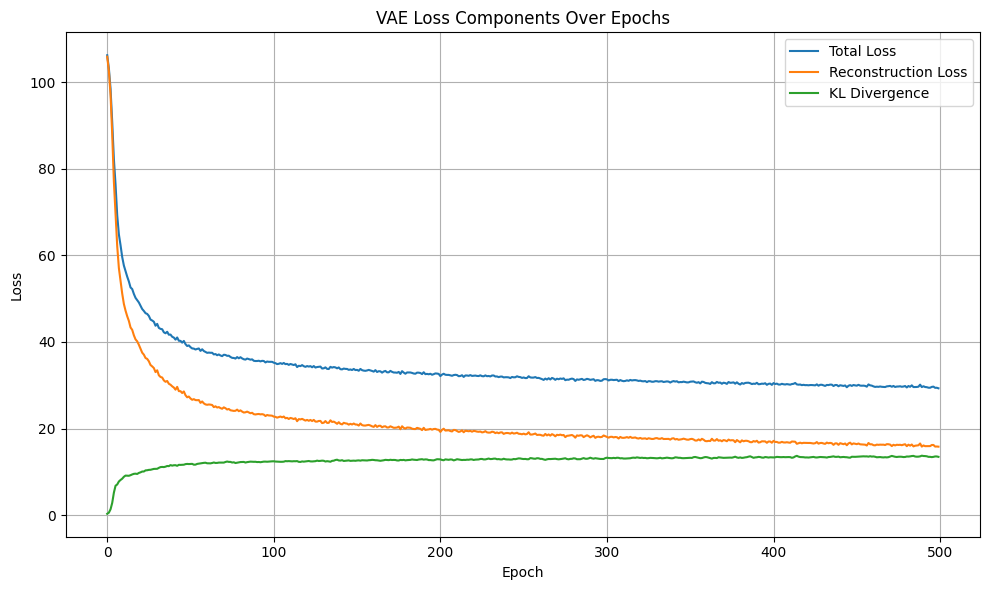

In [5]:
plot_vae_losses(total_loss_hist, recon_loss_hist, kld_loss_hist)

dim of latent mu: (331, 10)


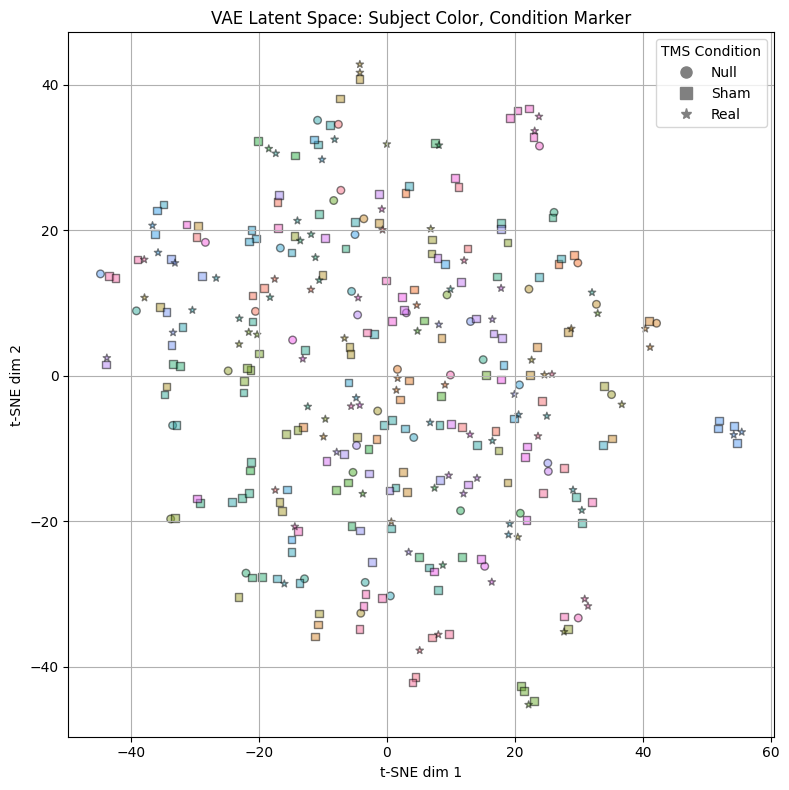

In [7]:
mu_all = get_latent_mu(model, X_tensor, device=DEVICE)
# 2d-TSNE
z_2d = TSNE(n_components=2, perplexity=8).fit_transform(mu_all)
plot_latent_embedding_by_condition_and_subject(z_2d, all_tms_type, all_subject_id)

Paired t-test: t = -2.903, p = 0.0057


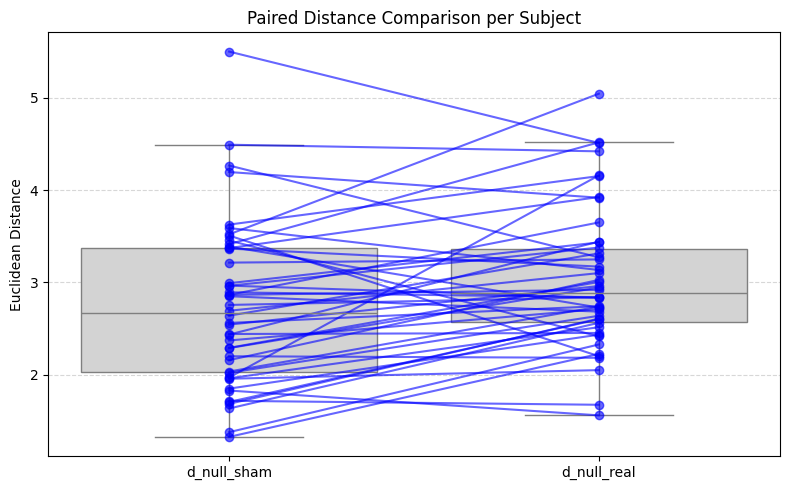

In [8]:
df = compute_condition_distances(mu_all, all_tms_type, all_subject_id, condition_map)

# Paired t-test
t_stat, p_val_t = ttest_rel(df["d_null_sham"], df["d_null_real"])
print(f"Paired t-test: t = {t_stat:.3f}, p = {p_val_t:.4f}")
plot_subject_distance_comparison(df)